<h1 style='color:purple' align='center'>Data Science Regression Project: Predicting Home Prices in Banglore</h1>

Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

<h2 style='color:blue'>Data Load: Load banglore home prices into a dataframe</h2>

In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
# 

In [67]:
df1.shape

(13320, 9)

In [68]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [69]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [70]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

**Drop features that are not required to build our model**

In [71]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

<h2 style='color:blue'>Data Cleaning: Handle NA values</h2>

In [72]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [73]:
df2.shape

(13320, 5)

In [74]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [75]:
df3.shape

(13246, 5)

<h2 style='color:blue'>Feature Engineering</h2>

**Add new feature(integer) for bhk (Bedrooms Hall Kitchen)**

In [76]:
df3['size'].unique()
# bhk = bedrooms 
# data cleaning needed here

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [77]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

C:\Users\Danish Kamal\AppData\Local\Temp\ipykernel_18912\3620022870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [78]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [79]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [80]:
df3['total_sqft'].unique()
# see => '1133 - 1384'

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**Explore total_sqft feature**

In [81]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [82]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


**Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple**

In [83]:
a='4444'
a=a.split(' ')
len(a)

1

In [84]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        #index 648= 4125Perch=NaN       
        return None   

In [85]:
convert_sqft_to_num('11-22')

16.5

In [86]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


**For below row, it shows total_sqft as 2475 which is an average of the range 2100-2850**

In [87]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [88]:
(2100+2850)/2

2475.0

<h2 style="color:blue">Feature Engineering</h2>

**Add new feature called price per square feet**

In [89]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()                          #lac

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [90]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [91]:
df5.to_csv("bhp.csv",index=False)

**Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations**

In [92]:
len(df5['location'].unique())


1298

In [93]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [94]:
location_stats.values.sum()

13200

In [95]:
location_stats[location_stats<10]
# location_stats[location_stats.values<10]

2nd Phase JP Nagar           9
Chandra Layout               9
Mathikere                    9
Kaverappa Layout             9
Peenya                       9
                            ..
Rajanna Layout               1
Subramanyanagar              1
Lakshmipura Vidyaanyapura    1
Malur Hosur Road             1
Abshot Layout                1
Name: location, Length: 1033, dtype: int64

In [96]:
len(location_stats[location_stats>10])

240

In [97]:
len(location_stats)

1287

In [98]:
len(location_stats[location_stats<=10])

1047

<h2 style="color:blue">Dimensionality Reduction</h2>

**Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns**

In [99]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [100]:
len(df5.location.unique())

1287

In [101]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [102]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


<h2 style="color:blue">Outlier Removal Using Business Logic</h2>

**As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft**

In [103]:
df5[(df5.total_sqft/df5.bhk)<300].head()

#error

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


**Check above data points. We have 6 bhk apartment with 1020 sqft. Another one is 8 bhk and total sqft is 600. These are clear data errors that can be removed safely**

In [104]:
df5.shape

(13200, 7)

In [105]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

<h2 style='color:blue'>Outlier Removal Using Standard Deviation and Mean</h2>

In [106]:
df6.price_per_sqft.describe()

# max and min value out of context

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

In [107]:
df6.groupby('location')

In [108]:
# df6.groupby('location')
                              #bhk
for key, subdf in df6.groupby('location'):
#     m = np.mean(subdf.price_per_sqft)
#     st = np.std(subdf.price_per_sqft)
#     reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
#     print(m+st)
#     print(m-st)
#     print()
    
#     break
    print(subdf)
    
#     print(key)    

                  location       size  total_sqft  bath  price  bhk  \
210    1st Block Jayanagar      4 BHK      2850.0   4.0  428.0    4   
848    1st Block Jayanagar      3 BHK      1630.0   3.0  194.0    3   
2152   1st Block Jayanagar      3 BHK      1875.0   2.0  235.0    3   
2355   1st Block Jayanagar  4 Bedroom      2400.0   4.0  450.0    4   
4991   1st Block Jayanagar      2 BHK      1000.0   3.0   60.0    2   
7138   1st Block Jayanagar      3 BHK      1200.0   2.0  130.0    3   
7358   1st Block Jayanagar      2 BHK      1235.0   2.0  148.0    2   
7383   1st Block Jayanagar      4 BHK      2750.0   4.0  413.0    4   
8507   1st Block Jayanagar      3 BHK      1760.0   3.0  115.0    3   
10972  1st Block Jayanagar      4 BHK      2450.0   4.0  368.0    4   

       price_per_sqft  
210      15017.543860  
848      11901.840491  
2152     12533.333333  
2355     18750.000000  
4991      6000.000000  
7138     10833.333333  
7358     11983.805668  
7383     15018.181818  
85

      location       size  total_sqft  bath  price  bhk  price_per_sqft
532    Arekere      2 BHK      1222.0   2.0   45.0    2     3682.487725
604    Arekere      3 BHK      2060.0   3.0  140.0    3     6796.116505
804    Arekere      2 BHK       920.0   2.0   40.0    2     4347.826087
877    Arekere      3 BHK      1740.0   2.0   95.0    3     5459.770115
1853   Arekere      2 BHK      1190.0   2.0   55.0    2     4621.848739
1945   Arekere      1 BHK       600.0   1.0   28.0    1     4666.666667
2613   Arekere      3 BHK      2072.0   3.0  108.0    3     5212.355212
2693   Arekere      2 BHK      1100.0   2.0   55.0    2     5000.000000
3145   Arekere      3 BHK      1445.0   2.0  125.0    3     8650.519031
6009   Arekere      2 BHK       900.0   2.0   50.0    2     5555.555556
6602   Arekere      3 BHK      2060.0   3.0  150.0    3     7281.553398
6836   Arekere      4 BHK      2710.0   6.0  142.0    4     5239.852399
7314   Arekere  3 Bedroom      2400.0   3.0  180.0    3     7500

         location   size  total_sqft  bath  price  bhk  price_per_sqft
55     Begur Road  2 BHK      1200.0   2.0  44.00    2     3666.666667
71     Begur Road  2 BHK      1358.0   2.0  80.58    2     5933.726068
374    Begur Road  2 BHK      1200.0   2.0  46.80    2     3900.000000
383    Begur Road  2 BHK      1160.0   2.0  44.00    2     3793.103448
517    Begur Road  3 BHK      1584.0   3.0  65.00    3     4103.535354
...           ...    ...         ...   ...    ...  ...             ...
12561  Begur Road  2 BHK      1215.0   2.0  43.75    2     3600.823045
12709  Begur Road  2 BHK      1200.0   2.0  44.73    2     3727.500000
12751  Begur Road  2 BHK      1160.0   2.0  42.00    2     3620.689655
12788  Begur Road  3 BHK      1583.0   3.0  95.23    3     6015.792798
12958  Begur Road  3 BHK      1410.0   2.0  54.99    3     3900.000000

[81 rows x 7 columns]
        location       size  total_sqft  bath  price  bhk  price_per_sqft
23     Bellandur      3 BHK      1767.0   3.0  103.

         location       size  total_sqft  bath   price  bhk  price_per_sqft
87     Dasanapura      2 BHK       708.0   2.0   37.00    2     5225.988701
438    Dasanapura      2 BHK       708.0   1.0   40.00    2     5649.717514
2569   Dasanapura      2 BHK       965.0   2.0   42.50    2     4404.145078
3128   Dasanapura      3 BHK      1286.0   3.0   61.44    3     4777.604977
3252   Dasanapura  2 Bedroom      1500.0   3.0   65.00    2     4333.333333
4436   Dasanapura      1 BHK       708.0   1.0   28.32    1     4000.000000
6460   Dasanapura      2 BHK       814.0   2.0   42.00    2     5159.705160
6845   Dasanapura      2 BHK      1163.0   2.0   65.00    2     5588.993981
8886   Dasanapura  4 Bedroom      2400.0   5.0  100.00    4     4166.666667
9139   Dasanapura      3 BHK      1286.0   2.0   68.00    3     5287.713841
10537  Dasanapura      2 BHK       708.0   2.0   31.15    2     4399.717514
10586  Dasanapura      2 BHK       814.0   2.0   53.00    2     6511.056511
12034  Dasan

      location       size  total_sqft  bath    price  bhk  price_per_sqft
364     Hennur      2 BHK      1075.0   2.0   52.000    2     4837.209302
1133    Hennur      2 BHK      1255.0   2.0   52.320    2     4168.924303
1793    Hennur      2 BHK      1225.0   2.0   57.000    2     4653.061224
2246    Hennur      2 BHK      1255.0   2.0   57.500    2     4581.673307
2443    Hennur      2 BHK      1259.0   2.0   57.000    2     4527.402701
2715    Hennur      2 BHK      1255.0   2.0   53.500    2     4262.948207
2732    Hennur      2 BHK      1285.0   2.0   60.000    2     4669.260700
3022    Hennur      2 BHK      1285.0   2.0   60.000    2     4669.260700
3326    Hennur      2 BHK      1100.0   2.0   60.000    2     5454.545455
3474    Hennur      2 BHK      1231.0   2.0   48.000    2     3899.268887
3517    Hennur      2 BHK      1255.0   2.0   58.000    2     4621.513944
4120    Hennur      2 BHK      1040.0   2.0   42.120    2     4050.000000
5205    Hennur      2 BHK      1255.0 

             location       size  total_sqft  bath  price  bhk  price_per_sqft
643    Jalahalli East      1 BHK       750.0   1.0  40.00    1     5333.333333
1101   Jalahalli East      3 BHK      1260.0   2.0  60.00    3     4761.904762
1866   Jalahalli East      2 BHK      1020.0   2.0  58.00    2     5686.274510
2810   Jalahalli East      2 BHK      1020.0   2.0  42.48    2     4164.705882
3690   Jalahalli East      3 BHK      1475.0   3.0  96.00    3     6508.474576
4925   Jalahalli East      3 BHK      1300.0   2.0  63.00    3     4846.153846
8871   Jalahalli East      1 BHK       775.0   1.0  34.10    1     4400.000000
10260  Jalahalli East      2 BHK      1010.0   2.0  52.00    2     5148.514851
11794  Jalahalli East      2 BHK      1035.0   2.0  42.50    2     4106.280193
12018  Jalahalli East      2 BHK      1010.0   2.0  52.00    2     5148.514851
12504  Jalahalli East  4 Bedroom      1200.0   4.0  80.00    4     6666.666667
13070  Jalahalli East      2 BHK      1020.0   2.0  

               location       size  total_sqft  bath  price  bhk  \
328    Kaval Byrasandra      2 BHK      1200.0   2.0   52.0    2   
733    Kaval Byrasandra      2 BHK      1020.0   2.0   52.0    2   
2477   Kaval Byrasandra      2 BHK      1200.0   2.0   49.5    2   
2656   Kaval Byrasandra      2 BHK       945.0   2.0   50.0    2   
3011   Kaval Byrasandra      2 BHK      1060.0   2.0   45.0    2   
3363   Kaval Byrasandra      3 BHK      2400.0   2.0   50.0    3   
3892   Kaval Byrasandra      2 BHK      1100.0   2.0   46.0    2   
4467   Kaval Byrasandra      2 BHK      1185.0   2.0   49.0    2   
4815   Kaval Byrasandra      2 BHK       997.0   2.0   53.0    2   
5308   Kaval Byrasandra      2 BHK      1060.0   2.0   42.0    2   
6714   Kaval Byrasandra      1 BHK       480.0   1.0   25.0    1   
8446   Kaval Byrasandra      2 BHK      1125.0   2.0   41.5    2   
8644   Kaval Byrasandra      2 BHK      1180.0   2.0   60.0    2   
9623   Kaval Byrasandra      3 BHK      1450.0  

     location       size  total_sqft  bath  price  bhk  price_per_sqft
1741  Laggere      1 BHK      1200.0   1.0   48.0    1     4000.000000
2095  Laggere  3 Bedroom      1200.0   2.0  150.0    3    12500.000000
3282  Laggere  5 Bedroom      2800.0   5.0  125.0    5     4464.285714
3678  Laggere  3 Bedroom      1200.0   3.0  130.0    3    10833.333333
4238  Laggere  4 Bedroom      1260.0   4.0  150.0    4    11904.761905
5297  Laggere  1 Bedroom      1200.0   1.0  125.0    1    10416.666667
6221  Laggere  2 Bedroom      1200.0   2.0   75.0    2     6250.000000
7097  Laggere      1 BHK      1500.0   1.0   60.0    1     4000.000000
8149  Laggere  1 Bedroom       620.0   2.0   48.0    1     7741.935484
9646  Laggere  5 Bedroom      1800.0   5.0   70.0    5     3888.888889
                   location   size  total_sqft  bath  price  bhk  \
53     Lakshminarayana Pura  2 BHK      1185.0   2.0   75.0    2   
375    Lakshminarayana Pura  3 BHK      1600.0   2.0  108.0    3   
934    Lakshmin

        location       size  total_sqft  bath   price  bhk  price_per_sqft
30     Yelahanka      4 BHK      2475.0   4.0  186.00    4     7515.151515
43     Yelahanka  1 Bedroom       660.0   1.0   48.00    1     7272.727273
54     Yelahanka      3 BHK      1600.0   2.0   75.00    3     4687.500000
82     Yelahanka      2 BHK      1326.0   2.0   78.00    2     5882.352941
141    Yelahanka      5 BHK      3050.0   5.0  213.00    5     6983.606557
...          ...        ...         ...   ...     ...  ...             ...
12853  Yelahanka      3 BHK      1282.0   2.0   48.72    3     3800.312012
12937  Yelahanka      2 BHK      1180.0   2.0   55.00    2     4661.016949
12980  Yelahanka      2 BHK      1267.0   3.0   78.00    2     6156.274665
12997  Yelahanka      2 BHK      1360.0   2.0   78.19    2     5749.264706
13011  Yelahanka      2 BHK      1025.0   2.0   44.00    2     4292.682927

[205 rows x 7 columns]
                 location       size  total_sqft  bath  price  bhk  \
816   

In [109]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

In [110]:
df7.price_per_sqft.describe()
#remove price per sq ft outlier

count    10242.000000
mean      5657.735993
std       2266.368844
min       1250.000000
25%       4244.796706
50%       5172.846776
75%       6426.000592
max      24509.803922
Name: price_per_sqft, dtype: float64

In [111]:
#random
# df7.loc[df7.index.isin([1,2,3])]

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

some 2 bhk price greater than 3 bhk of same location

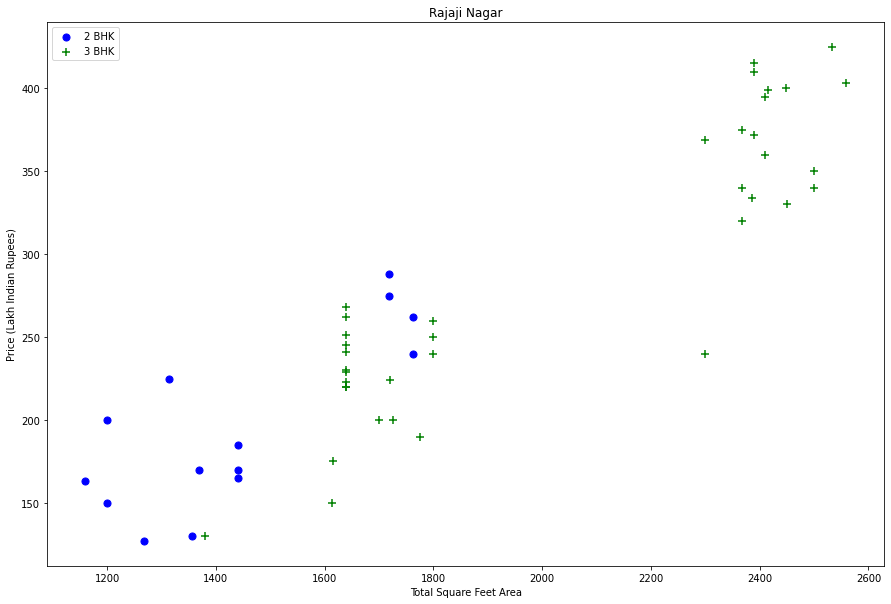

In [112]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    # legend=to show small box top left corner
    
    
plot_scatter_chart(df7,"Rajaji Nagar")

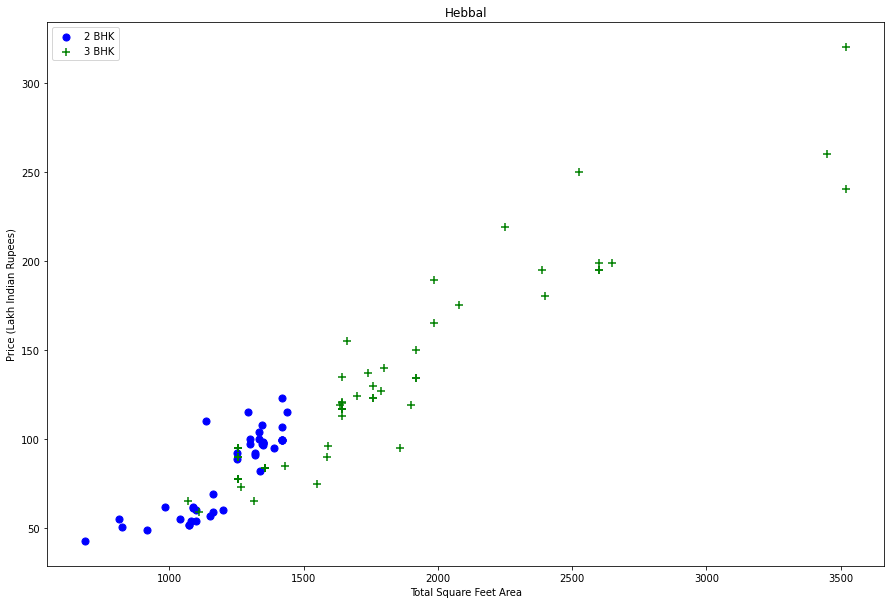

In [113]:
plot_scatter_chart(df7,"Hebbal")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**
```
{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
```
**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [114]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location_df, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            print(stats)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
#     print(bhk_stats)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

None
{'mean': 11983.805668016194, 'std': 0.0, 'count': 1}
{'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3}
None
{'mean': 5952.380952380952, 'std': 0.0, 'count': 1}
{'mean': 7931.806799837383, 'std': 1534.1422783514056, 'count': 8}
{'mean': 9151.192151725822, 'std': 1054.731726021645, 'count': 7}
{'mean': 7537.92218148637, 'std': 1607.0591069513537, 'count': 3}
None
{'mean': 3851.8518518518517, 'std': 497.593660834978, 'count': 3}
None
None
None
{'mean': 4755.410708222867, 'std': 374.06419031565235, 'count': 3}
None
{'mean': 3611.1111111111113, 'std': 0.0, 'count': 1}
None
{'mean': 4628.623188405797, 'std': 371.376811594203, 'count': 2}
{'mean': 5067.359785883266, 'std': 453.24956183513086, 'count': 17}
None
None
{'mean': 5932.976565810137, 'std': 671.9347030151997, 'count': 8}
{'mean': 8403.2863080867, 'std': 1515.4146231166221, 'count': 5}
None
{'mean': 6133.333333333334, 'std': 133.33333333333348, 'count': 2}
{'mean': 6272.516842644273, 'std': 1012.7881476778178, 'co

None
{'mean': 11160.714285714286, 'std': 0.0, 'count': 1}
{'mean': 9256.913801828407, 'std': 830.6145881127068, 'count': 4}
{'mean': 9845.92937034917, 'std': 1554.2575050192806, 'count': 16}
None
{'mean': 4065.297171500179, 'std': 228.5624776226282, 'count': 2}
None
{'mean': 4567.292659219588, 'std': 35.16727856616533, 'count': 9}
None
{'mean': 15888.888888888889, 'std': 1888.8888888888887, 'count': 2}
None
None
{'mean': 4170.472980827493, 'std': 176.69088584246873, 'count': 4}
{'mean': 4351.161786961001, 'std': 159.71264119139414, 'count': 5}
None
{'mean': 3201.9704433497536, 'std': 0.0, 'count': 2}
{'mean': 4187.198530290943, 'std': 615.4290329261535, 'count': 18}
{'mean': 4243.533192141064, 'std': 545.165771797653, 'count': 14}
None
{'mean': 5874.64951344219, 'std': 208.0884384424191, 'count': 3}
{'mean': 6639.764255543528, 'std': 469.4210339773065, 'count': 22}
None
{'mean': 5018.120021443538, 'std': 616.24268015249, 'count': 4}
{'mean': 5794.291811767968, 'std': 701.7168143003905,

None
{'mean': 7396.870554765292, 'std': 0.0, 'count': 1}
{'mean': 5148.4513864375285, 'std': 1338.7834520110716, 'count': 15}
{'mean': 5146.072400881765, 'std': 968.4512368875262, 'count': 19}
None
{'mean': 9176.470588235294, 'std': 0.0, 'count': 1}
{'mean': 5400.1387604070305, 'std': 402.12974684506605, 'count': 3}
{'mean': 5822.598600508905, 'std': 555.2046988018691, 'count': 4}
None
None
{'mean': 6698.432879783711, 'std': 1531.9654271563063, 'count': 17}
{'mean': 7331.054453361016, 'std': 1214.518355980384, 'count': 22}
None
{'mean': 4812.0300751879695, 'std': 0.0, 'count': 1}
{'mean': 5047.7294422212935, 'std': 827.4528669677713, 'count': 7}
None
{'mean': 9079.301075268817, 'std': 1337.3655913978491, 'count': 2}
{'mean': 6250.0, 'std': 0.0, 'count': 1}
None
None
{'mean': 6489.713291330108, 'std': 297.6789512592486, 'count': 22}
None
{'mean': 6502.821516842215, 'std': 338.4280109369237, 'count': 15}
None
{'mean': 4852.216357377289, 'std': 485.0957216437849, 'count': 8}
{'mean': 4739

(7317, 7)

**Plot same scatter chart again to visualize price_per_sqft for 2 BHK and 3 BHK properties**

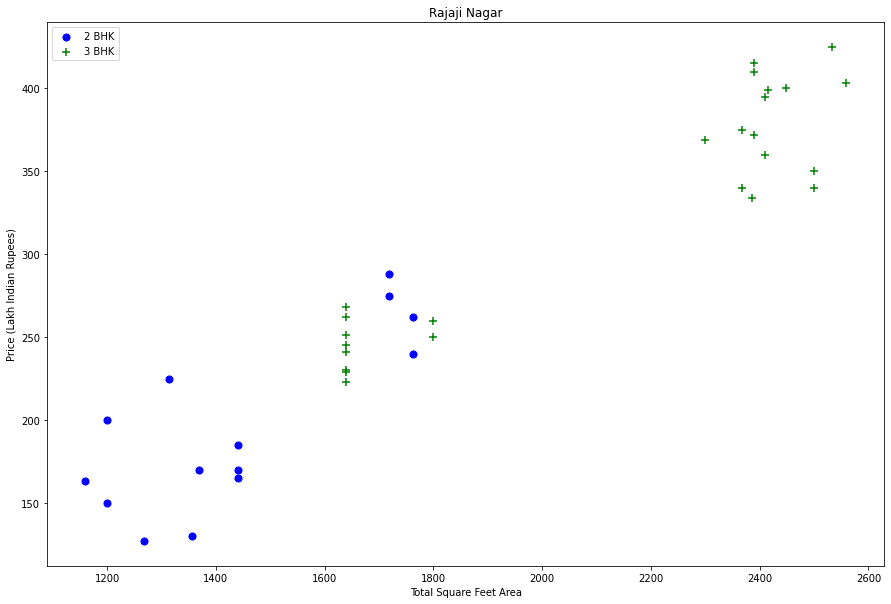

In [115]:
plot_scatter_chart(df8,"Rajaji Nagar")

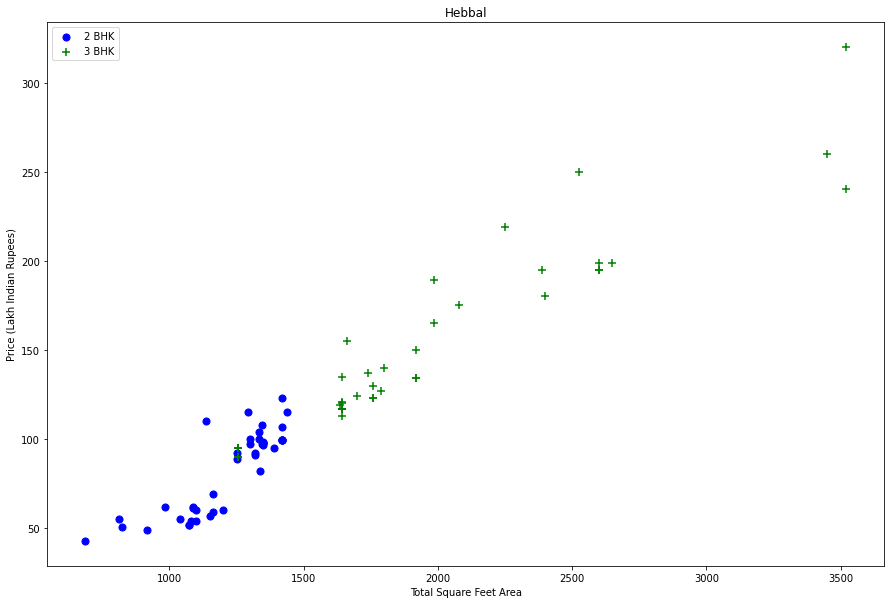

In [116]:
plot_scatter_chart(df8,"Hebbal")

**Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function**

<h3 style='color:green'>Before and after outlier removal: Rajaji Nagar</h3>

<img src="rajaji_nagar_outliers.png"></img>

<h3 style='color:green'>Before and after outlier removal: Hebbal</h3>

<img src="hebbal_outliers.png"></img>

Text(0, 0.5, 'Count')

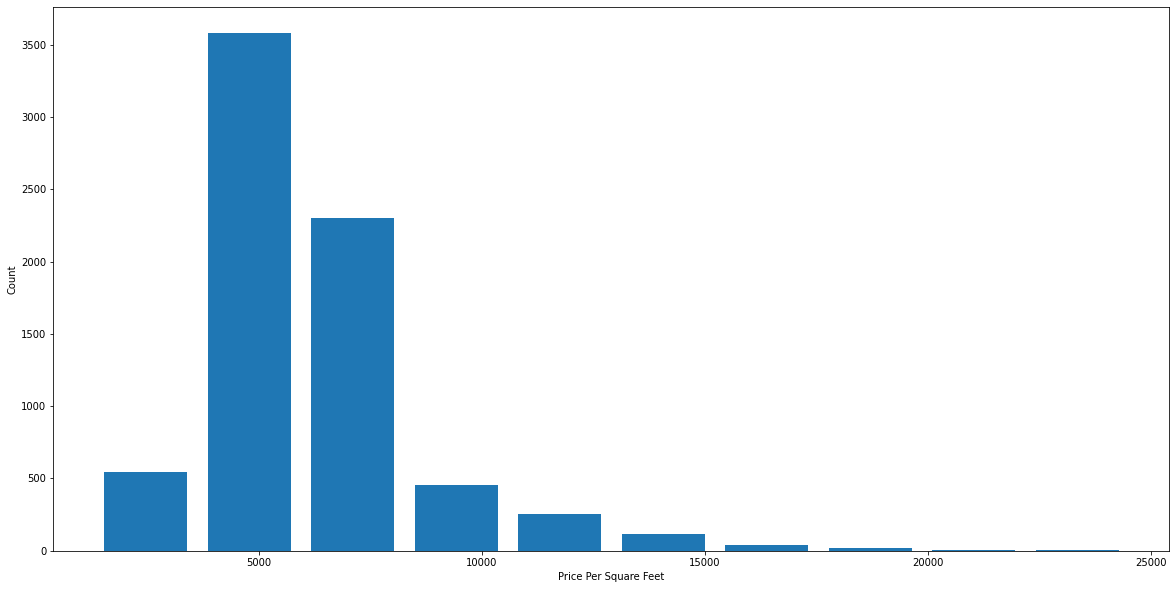

In [117]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

<h2 style='color:blue'>Outlier Removal Using Bathrooms Feature</h2>

In [118]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

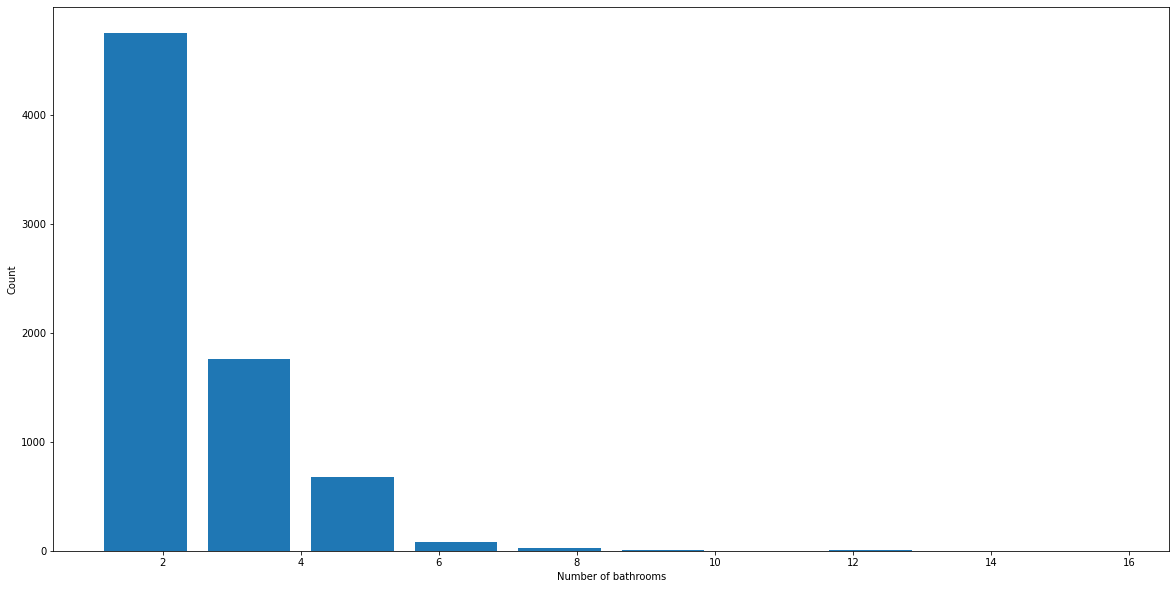

In [119]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [120]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8483,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8572,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9306,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9637,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


**It is unusual to have 2 more bathrooms than number of bedrooms in a home**

In [121]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8408,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


**Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [122]:
df9 = df8[df8.bath<=df8.bhk+2]
df9.shape

(7313, 7)

In [123]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [124]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


<h2 style='color:blue'>Use One Hot Encoding For Location</h2>

In [125]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



# DUMMY VARIABLE TRAP

Always drop the first column after performing One Hot Encoding?

Since, one-hot-encoding directly induces perfect multicollinearity, we drop one of the columns from the encoded features.

In [126]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')

df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h2 style='color:blue'>Build a Model Now...</h2>

In [128]:
df12.shape

(7313, 244)

In [129]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
X.shape

(7313, 243)

In [131]:
y = df12.price
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [132]:
len(y)

7313

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [134]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
print('Accuracy {:.2f}%'.format(lr_clf.score(X_test,y_test)*100))

Accuracy 81.01%


<h2 style='color:blue'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [138]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.86801733, 0.84558034, 0.83182627, 0.83917255, 0.86424179])

**We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

<h2 style='color:blue'>Find best model using GridSearchCV</h2>

In [276]:

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

algos = {
    'linear_regression' : {
        'model': LinearRegression(),
        'params': {
            'normalize': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion' : ['mse','friedman_mse'],
            'splitter': ['best','random']
        }
    }

}
# algos.items()
for algo_name, config in algos.items():
    print(algo_name)
    print(config)
    print()
    

linear_regression
{'model': LinearRegression(), 'params': {'normalize': [True, False]}}

lasso
{'model': Lasso(), 'params': {'alpha': [1, 2], 'selection': ['random', 'cyclic']}}

decision_tree
{'model': DecisionTreeRegressor(), 'params': {'criterion': ['mse', 'friedman_mse'], 'splitter': ['best', 'random']}}



In [279]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_*100,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\Danish Kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Danish Kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce t

C:\Users\Danish Kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Danish Kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Danish Kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,84.779578,{'normalize': False}
1,lasso,72.673792,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,71.831610,"{'criterion': 'mse', 'splitter': 'best'}"


**Based on above results we can say that LinearRegression gives the best score. Hence we will use that.**

<h2 style='color:blue'>Test the model for few properties</h2>

In [211]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [139]:
#index of column
a=np.where(X.columns=="2nd Phase Judicial Layout")[0][0]
b=X.columns.get_loc("2nd Phase Judicial Layout")
print(a)
print(b)

5
5


In [140]:
x = np.zeros(len(X.columns))
len(x)

243

In [152]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]
#     loc_index =X.columns.get_loc(location)
    

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [151]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

C:\Users\Danish Kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.71794810957331

In [191]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

C:\Users\Danish Kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.08062284998283

In [192]:
predict_price('Indira Nagar',1000, 2, 2)

C:\Users\Danish Kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.31197733179556

In [197]:
predict_price('Indira Nagar',1000, 3, 3)

C:\Users\Danish Kamal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.52689759854277

<h2 style='color:blue'>Export the tested model to a pickle file</h2>

In [66]:
# import pickle
# with open('banglore_home_prices_model.pickle','wb') as f:
#     pickle.dump(lr_clf,f)

<h2 style='color:blue'>Export location and column information to a file that will be useful later on in our prediction application</h2>

In [319]:
# import json
# columns = {
#     'data_columns' : [col.lower() for col in X.columns]
# }
# with open("columns.json","w") as f:
#     f.write(json.dumps(columns))


'total_sqft'